Projet: Propagation d'une maladie en Normandie
====

1 - Introduction 
------


L'objectif de ce projet est d'aller plus loin dans l'utilisation de numpy, Scipy, Matplotilb en réalisant un programme qui permette de visualiser la propagation d'une maladie en normandie 



In [ ]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt

import pickle

# Pour les tests
import sys
from io import StringIO 

: 

Afin de vous guider dans la détection d'erreur dans votre code. Nous avons introduit des blocs de tests. Il n'est pas nécessaire que vous compreniez en détail le code de ces blocs. Vous devez uniquement les exécuter et corriger les erreurs de votre code si un des tests n'est pas valide. Il est important de noter que le fait de valider le test ne garantit pas que votre code ne contient pas d'erreur. Par contre un test non validé implique nécessairement que votre code contient une erreur.

- Si tout les tests sont valides, vous aurez un message écrit en vert indiquant : Ok - Tous les tests sont validés.
- Si un des tests n'est pas valide, vous aurez un message écrit en rouge indiquant : Au moins un test n'est pas validé.
- Pour les tests non valides, vous aurez des éléments d'information sur le test non valide. En particulier, un message écrit en jaune vous détaillera la nature du test échoué.

2 - Villes les plus proches / Villes les plus loins
-----

Nous allons écrire un programme qui recherche les 10 villes les plus proches d'une ville donnée. 
Commencez par récupérer les coordonnées des villes de Normandie sans doublon que nous avions calculées dans le TP 2. Les valeurs avait été placées dans un fichier `data.pickle`. Vous placerez les coordonnées dans la variable `coord`.

In [8]:
with open('data.pickle', 'rb') as f:  
    [ville,nom_ville,coord] = pickle.load(f)

In [9]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(coord.shape,(2946,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : coord n\'a pas la bonne taille. Vérifiez que les doublons ont bien été enlevé et que coord.shape==(2946,2)'))
    np.testing.assert_almost_equal(coord[0],[49.4,0.3],err_msg="\033[93m {}\033[00m" .format('Test 2 : Les premières valeurs de coord ne sont pas correcte.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Calculez la distance entre toutes les villes de Normandie (sans doublon) que vous placerez dans la variable `d_villes`. Pour cela nous allons utiliser les fonctions `pdist` et `squareform` comme au TP 2 et une distance euclidienne sur les points 3D.  
Attention les coordonnées doivent être sous la forme x,y,z et non latitude/longitude.

In [10]:
%%time

def convert3D(u):
    R = 6367.445
    u = np.radians(u)
    xyz = np.zeros((u.shape[0],3))
    xyz[:,0] = R*np.cos(u[:,0])*np.sin(u[:,1])
    xyz[:,1] = R*np.cos(u[:,0])*np.cos(u[:,1])
    xyz[:,2] = R*np.sin(u[:,0])
    return xyz
point3D = sc.spatial.distance.pdist(convert3D(coord))
d_villes =sc.spatial.distance.squareform(point3D)
print(d_villes)


[[  0.          38.90070972  91.34728015 ...  42.187868   107.76482934
   30.91651566]
 [ 38.90070972   0.          53.17629436 ...  29.13848352 117.05845445
   53.24408826]
 [ 91.34728015  53.17629436   0.         ...  72.12884621 135.68913311
  104.73514423]
 ...
 [ 42.187868    29.13848352  72.12884621 ...   0.         141.11354121
   36.19533948]
 [107.76482934 117.05845445 135.68913311 ... 141.11354121   0.
  138.09177414]
 [ 30.91651566  53.24408826 104.73514423 ...  36.19533948 138.09177414
    0.        ]]
CPU times: user 37.4 ms, sys: 14.1 ms, total: 51.5 ms
Wall time: 50.8 ms


In [11]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(d_villes.shape,(2946,2946),err_msg="\033[93m {}\033[00m" .format('Test 1 : dist n\'a pas la bonne taille. Vérifiez que les doublons ont bien été enlevé et que dist.shape==(2946,2946)'))
    np.testing.assert_almost_equal(d_villes-d_villes.T,np.zeros(d_villes.shape),err_msg="\033[93m {}\033[00m" .format('Test 2 : La distance entre A et B doit être la même qu\'entre B et A.'))
    np.testing.assert_almost_equal(np.sum(d_villes),888370473.7872453,err_msg="\033[93m {}\033[00m" .format('Test 3 : Certaines distances sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Récupérez, dans la variable `dist_Caen`, la distance entre *Caen* et les autres villes de Normandie. Il s'agit de retrouver dans la matrice `d_villes` la ligne associée à *Caen*.

In [12]:
dist_Caen = d_villes[ville['Caen']]
print(dist_Caen)

[ 52.90934949  76.30728647 115.45986608 ...  92.5783011   59.51344251
  81.12100076]


In [13]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(dist_Caen.shape,(2946,),err_msg="\033[93m {}\033[00m" .format('Test 1 : dist_Caen n\'a pas la bonne taille. Vérifiez que len(dist_Caen)==2946'))
    np.testing.assert_almost_equal(dist_Caen[:3],[52.9093495,  76.3072865, 115.4598661],err_msg="\033[93m {}\033[00m" .format('Test 2 : Les premières distances doivent être [52.9093495,  76.3072865, 115.4598661 ...].'))
    np.testing.assert_almost_equal(np.sum(dist_Caen),237420.0423234083,err_msg="\033[93m {}\033[00m" .format('Test 3 : Certaines distances sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
  

 Ok - Tous les tests sont validés.


En utilisant le tableau `nom_ville` défini au TP 2 et la fonction `np.argsort` qui permet d'ordonner les indices du vecteur `dist_Caen` selon l'ordre croissant des distances associées, donnez le nom des 10 villes les plus proches de *Caen*.

Pour cela vous compléterez la fonction `affichage_sans_mise_en_forme_10procheCaen`. Cette fonction ne retourne rien et fait l'affichage du résultat. Le rendu doit être similaire à : 
```
['Hérouville-Saint-Clair' 'Louvigny' 'Mondeville'
'Saint-Germain-la-Blanche-Herbe' 'Epron' 'Colombelles' 'Fleury-sur-Orne'
'Giberville' 'Bretteville-sur-Odon' 'Saint-Contest']
```

In [14]:
def affichage_sans_mise_en_forme_10procheCaen():
    villeProche = np.argsort(dist_Caen)[1:11]
    
    print(nom_ville[villeProche])

print('\033[34mAffichage sans mise en forme:\033[0m\n') 
affichage_sans_mise_en_forme_10procheCaen()

Affichage sans mise en forme:

['Hérouville-Saint-Clair' 'Louvigny' 'Mondeville'
 'Saint-Germain-la-Blanche-Herbe' 'Epron' 'Colombelles' 'Fleury-sur-Orne'
 'Giberville' 'Bretteville-sur-Odon' 'Saint-Contest']


In [15]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier. 
_str_print_ = StringIO()
_original_stdout = sys.stdout
sys.stdout = _str_print_

affichage_sans_mise_en_forme_10procheCaen()
try:
    np.testing.assert_equal(_str_print_.getvalue().replace('\n',''),
                            "['Hérouville-Saint-Clair' 'Louvigny' 'Mondeville'\n 'Saint-Germain-la-Blanche-Herbe' 'Epron' 'Colombelles' 'Fleury-sur-Orne'\n 'Giberville' 'Bretteville-sur-Odon' 'Saint-Contest']\n".replace('\n',''),
                           err_msg="\033[93m {}\033[00m" .format('Test 1 : l\'affichage n\'est pas conforme au rendu attendu.')
                           )
except Exception as e: 
    sys.stdout = _original_stdout
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    sys.stdout = _original_stdout
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.'))


 Ok - Tous les tests sont validés.


En utilisant une boucle `for` mettez en forme l'affichage pour avoir le rendu suivant:
```
Hérouville-Saint-Clair est à une distance de 3.05km de Caen.
Louvigny est à une distance de 3.05km de Caen.
Mondeville est à une distance de 3.05km de Caen.
Saint-Germain-la-Blanche-Herbe est à une distance de 3.63km de Caen.
Epron est à une distance de 3.9km de Caen.
Colombelles est à une distance de 4.08km de Caen.
Fleury-sur-Orne est à une distance de 4.43km de Caen.
Giberville est à une distance de 4.84km de Caen.
Bretteville-sur-Odon est à une distance de 5.19km de Caen.
Saint-Contest est à une distance de 5.19km de Caen.
```
Vous utiliserez la fonction `np.round` pour les arrondis.

In [16]:
def affichage_avec_mise_en_forme_10procheCaen():
    villeProche = np.argsort(dist_Caen)[1:11]
    nomVilleProche = nom_ville[villeProche]
    distanceVilleProche = dist_Caen[villeProche]
    for i in range (len(villeProche)):
        print(nomVilleProche[i],"est à une distance de",str(np.round(distanceVilleProche[i],2))+"km de Caen.")
    
print('\033[34mAffichage avec mise en forme: \033[0m')
print()
affichage_avec_mise_en_forme_10procheCaen() 
 
    

Affichage avec mise en forme: 

Hérouville-Saint-Clair est à une distance de 3.05km de Caen.
Louvigny est à une distance de 3.05km de Caen.
Mondeville est à une distance de 3.05km de Caen.
Saint-Germain-la-Blanche-Herbe est à une distance de 3.63km de Caen.
Epron est à une distance de 3.9km de Caen.
Colombelles est à une distance de 4.08km de Caen.
Fleury-sur-Orne est à une distance de 4.43km de Caen.
Giberville est à une distance de 4.84km de Caen.
Bretteville-sur-Odon est à une distance de 5.19km de Caen.
Saint-Contest est à une distance de 5.19km de Caen.


In [17]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier. 
_str_print_ = StringIO()
_original_stdout = sys.stdout
sys.stdout = _str_print_

affichage_avec_mise_en_forme_10procheCaen()
try:
    np.testing.assert_equal(_str_print_.getvalue(),
                            "Hérouville-Saint-Clair est à une distance de 3.05km de Caen.\n\
Louvigny est à une distance de 3.05km de Caen.\n\
Mondeville est à une distance de 3.05km de Caen.\n\
Saint-Germain-la-Blanche-Herbe est à une distance de 3.63km de Caen.\n\
Epron est à une distance de 3.9km de Caen.\n\
Colombelles est à une distance de 4.08km de Caen.\n\
Fleury-sur-Orne est à une distance de 4.43km de Caen.\n\
Giberville est à une distance de 4.84km de Caen.\n\
Bretteville-sur-Odon est à une distance de 5.19km de Caen.\n\
Saint-Contest est à une distance de 5.19km de Caen.\n",
                           err_msg="\033[93m {}\033[00m" .format('Test 1 : l\'affichage n\'est pas conforme au rendu attendu.')
                           )
except Exception as e: 
    sys.stdout = _original_stdout
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    sys.stdout = _original_stdout
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.'))

 Ok - Tous les tests sont validés.


In [18]:
dist_rouen = d_villes[ville["Rouen"]]

Vous ferez de même avec le calcul des 10 villes les plus éloignées de *Rouen*.

In [19]:
def affichage_sans_mise_en_forme_10loinRouen():
    dist_rouen = d_villes[ville["Rouen"]]
    villeLoinRouen = np.argsort(dist_rouen)[-1:-11:-1]
    
    print(nom_ville[villeLoinRouen])
    

def affichage_avec_mise_en_forme_10loinRouen():
    
    dist_rouen = d_villes[ville["Rouen"]]
    villeLoinRouen = np.argsort(dist_rouen)[-1:-11:-1]
    distanceVilleLoinRouen = dist_rouen[villeLoinRouen]
    nomVilleLoinRouen = nom_ville[villeLoinRouen]
    
    for i in range (len(distanceVilleLoinRouen)):
        print(nomVilleLoinRouen[i],"est à une distance de",str(np.round(distanceVilleLoinRouen[i],2))+"km de Rouen.")
    
print('\033[34mAffichage sans mise en forme:\033[0m')
affichage_sans_mise_en_forme_10loinRouen()

print()
print('\033[34mAffichage avec mise en forme: \033[0m')
affichage_avec_mise_en_forme_10loinRouen()

Affichage sans mise en forme:
['Auderville' 'Saint-Germain-des-Vaux' 'Jobourg' 'Omonville-la-Petite'
 'Herqueville' 'Digulleville' 'Pontorson' 'Omonville-la-Rogue'
 'Flamanville' 'Beaumont-Hague']

Affichage avec mise en forme: 
Auderville est à une distance de 219.43km de Rouen.
Saint-Germain-des-Vaux est à une distance de 218.67km de Rouen.
Jobourg est à une distance de 217.1km de Rouen.
Omonville-la-Petite est à une distance de 215.85km de Rouen.
Herqueville est à une distance de 215.44km de Rouen.
Digulleville est à une distance de 214.66km de Rouen.
Pontorson est à une distance de 213.48km de Rouen.
Omonville-la-Rogue est à une distance de 213.47km de Rouen.
Flamanville est à une distance de 213.25km de Rouen.
Beaumont-Hague est à une distance de 213.06km de Rouen.


In [20]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier. 
_str_print_ = StringIO()
_original_stdout = sys.stdout
sys.stdout = _str_print_

try:
    affichage_sans_mise_en_forme_10loinRouen()
    np.testing.assert_equal(_str_print_.getvalue().replace('\n',''),
                            "['Auderville' 'Saint-Germain-des-Vaux' 'Jobourg' 'Omonville-la-Petite'\n 'Herqueville' 'Digulleville' 'Pontorson' 'Omonville-la-Rogue'\n 'Flamanville' 'Beaumont-Hague']\n".replace('\n',''),
                           err_msg="\033[93m {}\033[00m" .format('Test 1 : l\'affichage sans mise en forme n\'est pas conforme au rendu attendu.')
                           )
    _str_print_.truncate(0)
    _str_print_.seek(0)
    affichage_avec_mise_en_forme_10loinRouen()
    np.testing.assert_equal(_str_print_.getvalue(),
                            "Auderville est à une distance de 219.43km de Rouen.\n\
Saint-Germain-des-Vaux est à une distance de 218.67km de Rouen.\n\
Jobourg est à une distance de 217.1km de Rouen.\n\
Omonville-la-Petite est à une distance de 215.85km de Rouen.\n\
Herqueville est à une distance de 215.44km de Rouen.\n\
Digulleville est à une distance de 214.66km de Rouen.\n\
Pontorson est à une distance de 213.48km de Rouen.\n\
Omonville-la-Rogue est à une distance de 213.47km de Rouen.\n\
Flamanville est à une distance de 213.25km de Rouen.\n\
Beaumont-Hague est à une distance de 213.06km de Rouen.\n",
                           err_msg="\033[93m {}\033[00m" .format('Test 2 : l\'affichage avec mise en forme n\'est pas conforme au rendu attendu.')
                           )
except Exception as e: 
    sys.stdout = _original_stdout
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    sys.stdout = _original_stdout
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.'))

 Ok - Tous les tests sont validés.


Affichez les villes de Normandie dans une figure matplotlib et mettez :
- en jaune, *Caen* et *Rouen*, 
- en vert, les 10 villes les plus proches de *Caen*,
- en rouge, les 10 villes les plus loin de *Rouen*.

Le rendu devrait être similaire à :
<div align=center>
 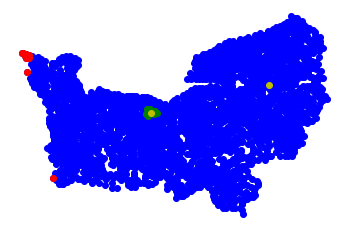
   </div>

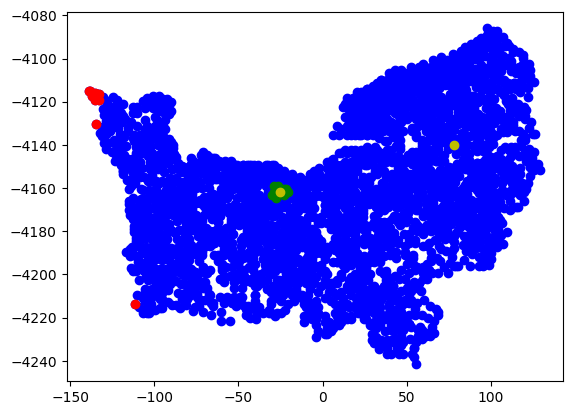

In [21]:

coord_xyz = convert3D(coord)
vv1_indice = np.argsort(dist_Caen)[1:11]
vv2_indice = np.argsort(dist_rouen)[:-11:-1]
plt.scatter(coord_xyz[:,0], -coord_xyz[:,1],color='b')
plt.scatter(coord_xyz[vv1_indice,0], -coord_xyz[vv1_indice,1],color='g')
plt.scatter(coord_xyz[vv2_indice,0], -coord_xyz[vv2_indice,1],color='r')
plt.scatter(coord_xyz[ville['Caen'],0], -coord_xyz[ville['Caen'],1],color='y')
plt.scatter(coord_xyz[ville['Rouen'],0], -coord_xyz[ville['Rouen'],1],color='y')

plt.show()

3 - Histogramme des distances des villes
----

Au moyen de la fonction `np.histogram`(voir le TP1) calculez et affichez l’histogramme des distances entre villes de Normandie. Le résultat devrait être proche de la figure suivante:
<div align=center>
 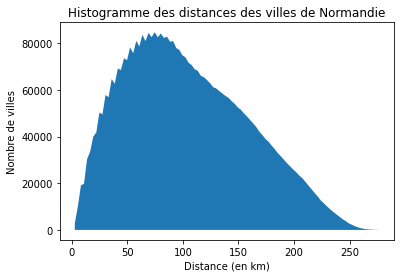
   </div>

In [22]:
d_villes =sc.spatial.distance.squareform(point3D)

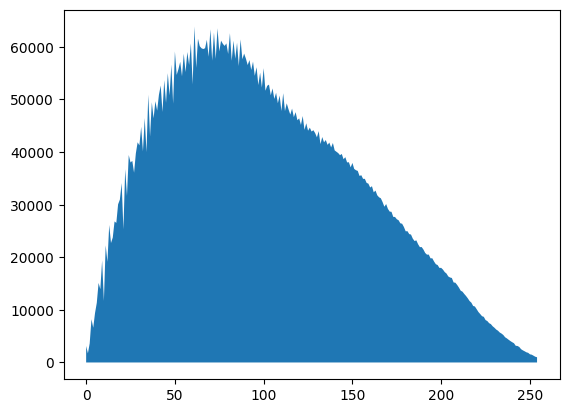

In [23]:
hist,bins = np.histogram(d_villes,bins=255,range=(0,255))
plt.fill_between(bins[:-1],0,hist)

4 - Le début de l'épidémie
----

Affichez les villes normandes à l'écran avec `matplotlib`. Ajoutez aux arguments de la fonction `plt.scatter` les valeurs `color='b',marker='s',s=5,alpha=0.1`. À votre avis que font ces arguments ?

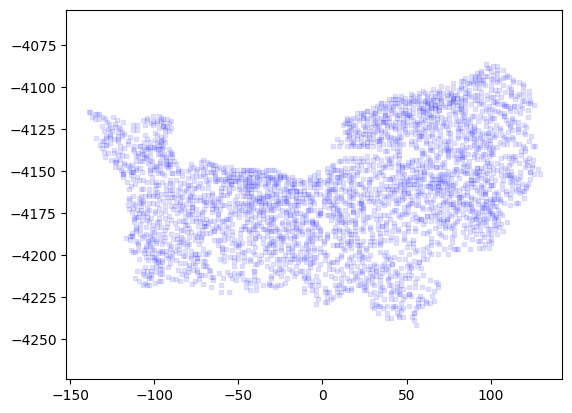

In [24]:
cord = convert3D(coord)
plt.axis('equal')

plt.scatter(cord[:,0],-cord[:,1],color='b',marker='s',s=5,alpha=0.1)

Pour le début de l'épidémie nous allons considérer que chaque ville à un risque de $\\dfrac{1}{500}$ d'être un foyer de l'infection. Nous allons construire une fonction retournant un vecteur contenant autant d'éléments qu'il y a de villes et dont les valeurs sont soit True (si la ville est un foyer initiale de l'infection) soit False. Pour construire ce vecteur, faites les opérations suivantes :

1. Définissez une variable $n$ contenant le nombre de villes de Normandie.
2. Tirez au hasard selon une loi uniforme un vecteur `alea` de $n$ valeurs entre 0 et 1.
3. Testez si les valeurs du vecteur `alea` sont inférieures à $\dfrac{1}{500}$. Le résultat de chaque test définira le vecteur `ville_src`. Vous n'avez pas besoin de `for` pour cette question.

In [25]:
def init_foyers_epidemie():
    n = len(nom_ville)
    alea = np.random.rand(n)
    villes_src = alea < 1/500
    return villes_src
villes_src = init_foyers_epidemie()

In [26]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  

try:    
    assert villes_src is not None
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print('')
    print("\033[93m {}\033[00m" .format('Test 1 : La fonction init_foyers_epidemie n\'a pas de valeur de retour.'))
    print(e)  
    raise e

try:          
    np.testing.assert_equal(villes_src.shape,(2946,),err_msg="\033[93m {}\033[00m" .format('Test 2 : La taille du tableau retournée par init_foyers_epidemie est incorrecte. La sortie doit être de même taille que le nombre de ville de Normandie.'))
    np.testing.assert_equal(villes_src.dtype,np.dtype('bool'),err_msg="\033[93m {}\033[00m" .format('Test 3 : Les valeurs du tableaux doivent être des booleans.'))
    np.testing.assert_array_less(np.sum(villes_src),20,err_msg="\033[93m {}\033[00m" .format('Test 4 : Il y a probablement une erreur dans les valeurs créées. Il est possible de raté ce test avec un code correct mais la probabilité est très faible (environ 3 chances sur un million). Dans ce cas relancez le test, si vous continuez à ne pas le valider et que vous pensez que votre code est correct, jouez au loto !'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 


 Ok - Tous les tests sont validés.


Reprenez la précédente figure. Superposez sur l'image des points rouges correspondants aux villes contaminées. Si vous relancez le code précédent, les villes en rouges devraient changer.

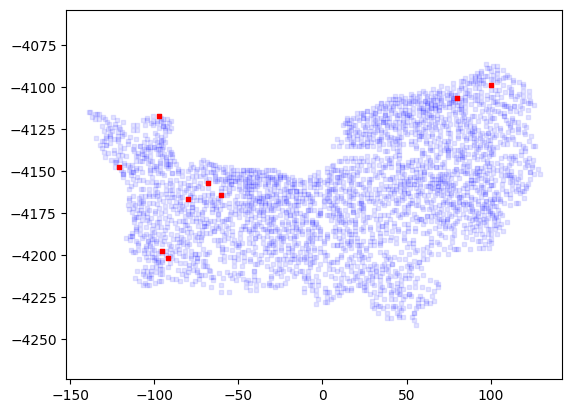

In [27]:
plt.axis('equal')

plt.scatter(cord[:,0],-cord[:,1],color='b',marker='s',s=5,alpha=0.1)
plt.scatter(cord[villes_src,0],-cord[villes_src,1],color='r',marker='s',s=5)


5 - La propagation de la maladie
-------

On va dans cette partie modéliser la propagation de la maladie. On va supposer
que les villes nouvelles contaminées suivent une loi normale centrée sur les villes déjà
infectées.

Définissez une variable $s$ égale à 4. Vous pourrez changer par la suite cette valeur pour accélérer ou ralentir la propagation de la maladie.

In [28]:
s= 8

Tirez selon une loi normale centrée réduite les valeurs d’une matrice nommée `nouvelle_ville_contamine_valeur`. Cette matrice aura la même taille que la matrice `d_villes`. Elle va nous permettre de choisir les villes nouvellement contaminées en fonction de leurs distances aux villes contaminées.

In [29]:

n = np.shape(d_villes)
alea = np.random.standard_normal(n)
nouvelle_ville_contamine_valeur = alea 



In [30]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(nouvelle_ville_contamine_valeur.shape,d_villes.shape,err_msg="\033[93m {}\033[00m" .format('Test 1 : nouvelle_ville_contamine_valeur n\'a pas la bonne taille. Vérifiez que les dimensions de nouvelle_ville_contamine_valeur et d_villes sont les mêmes.'))
    np.testing.assert_array_less(np.abs(np.mean(nouvelle_ville_contamine_valeur)),1e-2,err_msg="\033[93m {}\033[00m" .format('Test 2 : Il y a probablement une erreur sur la loi de probabilité que vous utilisez. Elle n\'est pas centré.'))
    np.testing.assert_array_less(np.abs(1-np.std(nouvelle_ville_contamine_valeur)),1e-2,err_msg="\033[93m {}\033[00m" .format('Test 3 : Il y a probablement une erreur sur la loi de probabilité que vous utilisez. L\'écart type de loi normal doit être à 1.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 


 Ok - Tous les tests sont validés.


Multipliez les valeurs de la matrice `nouvelle_ville_contamine_valeur` par $s$ pour fixer la vitesse de propagation. 

In [31]:
print(nouvelle_ville_contamine_valeur.shape)
nouvelle_ville_contamine_valeur = nouvelle_ville_contamine_valeur * s

(2946, 2946)


In [32]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(nouvelle_ville_contamine_valeur.shape,d_villes.shape,err_msg="\033[93m {}\033[00m" .format('Test 1 : nouvelle_ville_contamine_valeur n\'a pas la bonne taille. Vérifiez que les dimensions de nouvelle_ville_contamine_valeur et d_villes sont les mêmes.'))
    np.testing.assert_array_less(np.abs(np.mean(nouvelle_ville_contamine_valeur)),1e-2,err_msg="\033[93m {}\033[00m" .format('Test 2 : Il y a probablement une erreur sur la loi de probabilité que vous utilisez. Elle n\'est pas centré.'))
    np.testing.assert_array_less(np.abs(s-np.std(nouvelle_ville_contamine_valeur)),1e-2,err_msg="\033[93m {}\033[00m" .format('Test 3 : la nouvelle valeur de nouvelle_ville_contamine_valeur n\'est par correcte.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Construisez une nouvelle matrice `nouvelle_ville_contamine` qui contient `True` pour les valeurs dans `nouvelle_ville_contamine_valeur` dont la valeur absolue est plus grande que la valeur dans `d_villes` et `False` pour les autres. Cette matrice permet de connaître la contamination potentielle des villes. Les villes en colonne indiquent si la ville serait contaminée dans l'hypothèse où la ville indiquée par la ligne est déjà contaminée.

In [33]:
# YOUR CODE HERE
nouvelle_ville_contamine = nouvelle_ville_contamine_valeur>d_villes
print(nouvelle_ville_contamine)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False  True False]
 [False False False ... False False False]]


In [34]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(nouvelle_ville_contamine.shape,(2946, 2946),err_msg="\033[93m {}\033[00m" .format('Test 1 : nouvelle_ville_contamine n\'a pas la bonne taille. nouvelle_ville_contamine est une matrice carré dont le nombre de ligne correspond au nombre de ville de Normandie.'))
    np.testing.assert_equal(nouvelle_ville_contamine.dtype,np.dtype('bool'),err_msg="\033[93m {}\033[00m" .format('Test 2 : nouvelle_ville_contamine_valeur doit contenir des booleans.'))
    
    _tmp1,_tmp2 = np.where(nouvelle_ville_contamine)
    np.testing.assert_equal(np.all(np.abs(nouvelle_ville_contamine_valeur[_tmp1,_tmp2]) > d_villes[_tmp1,_tmp2] ),True,err_msg="\033[93m {}\033[00m" .format('Test 3 : certaines valeurs ne sont pas correcte.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Multipliez la matrice précédente par la matrice `villes_src` et sommez les valeurs suivant les colonnes. Numpy remplacera les valeurs True par 1 et False par 0 pour faire le calcul. Cela produira un vecteur qui compte pour chaque ville le nombre de villes qui sont sources de sa contamination. Si la valeur est 0, la ville n'est pas encore contaminée.
Vous placerez le résultat dans la variable `villes_contaminees`.

In [35]:
# YOUR CODE HERE
villes_contaminees =np.sum(nouvelle_ville_contamine * villes_src ,axis=1)

In [36]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(villes_contaminees.shape,(2946,),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de villes_contaminees ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Testez si les valeurs du vecteur précédent sont supérieures strictement à 0. Si c'est le cas, c'est que la ville est contaminée.

In [37]:
# YOUR CODE HERE
villes_contaminees=villes_contaminees>0

In [38]:
try:
    np.testing.assert_equal(villes_contaminees.dtype,np.dtype('bool'),err_msg="\033[93m {}\033[00m" .format('Test 1 : Le type des éléments du tableau n\'est pas correct.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Reprenez la figure précédente et affichez-y les villes nouvellement contaminées en vert. Que remarquez-vous sur les villes contaminées au début de l'épidémie ?

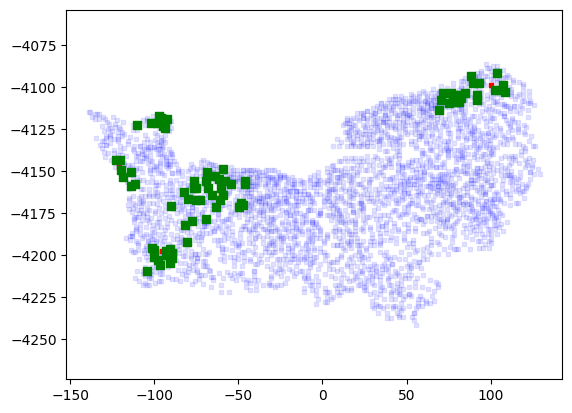

In [39]:
# YOUR CODE HERE
plt.axis('equal')

plt.scatter(cord[:,0],-cord[:,1],color='b',marker='s',s=5,alpha=0.1)
plt.scatter(cord[villes_src,0],-cord[villes_src,1],color='r',marker='s',s=5)
plt.scatter(cord[villes_contaminees,0],-cord[villes_contaminees,1],color='g',marker='s',)
plt.show()

À l'aide d'une boucle `for` réitérer plusieurs fois (par exemple 5 fois) les opérations précédentes pour voir la propagation de la maladie au bout d'un certain temps. À chaque itération, on prendra comme `villes_src`, toutes les villes précédemment contaminées. 

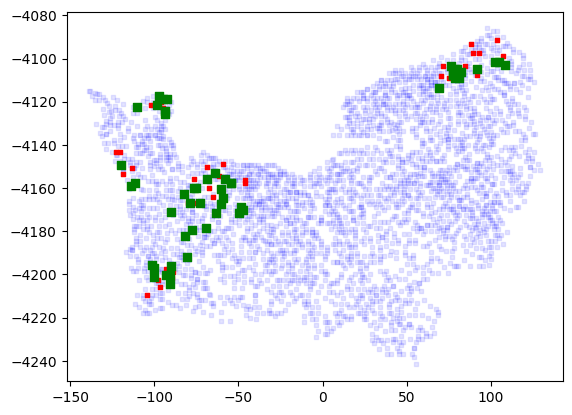

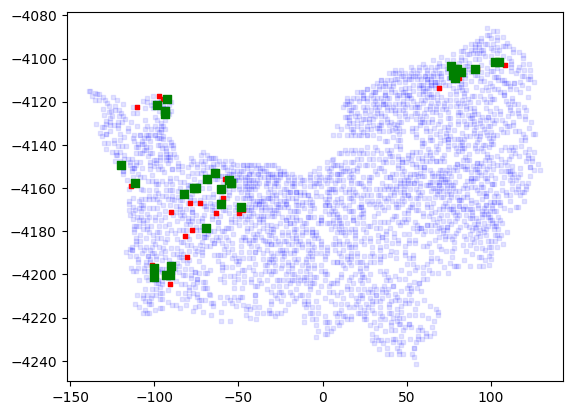

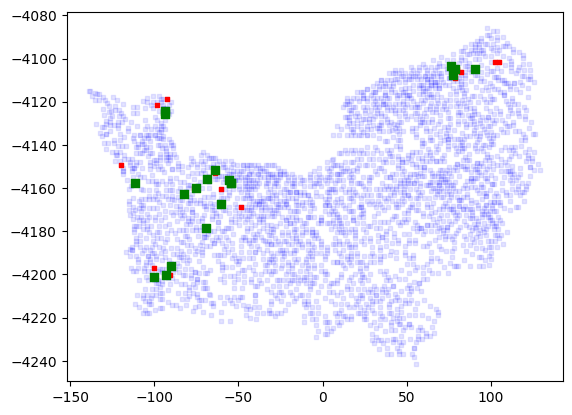

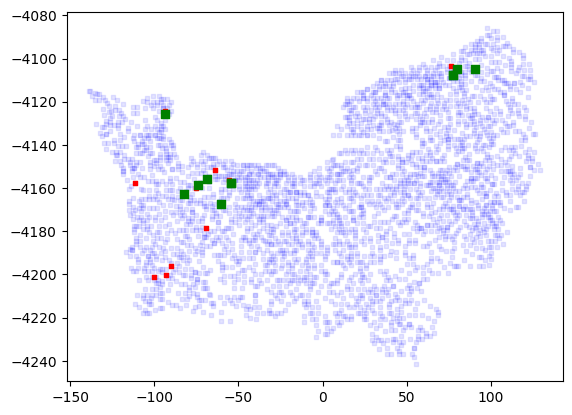

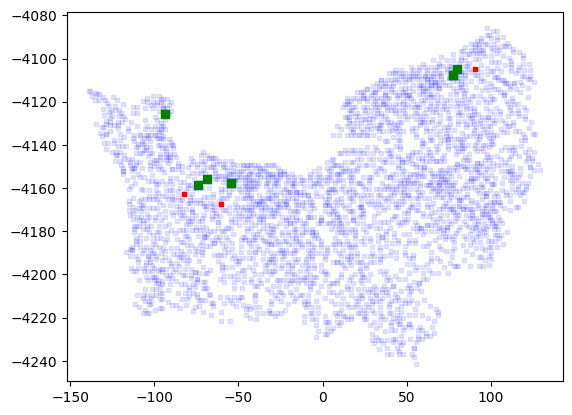

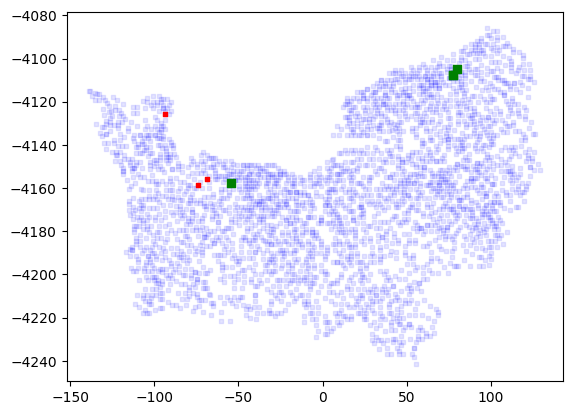

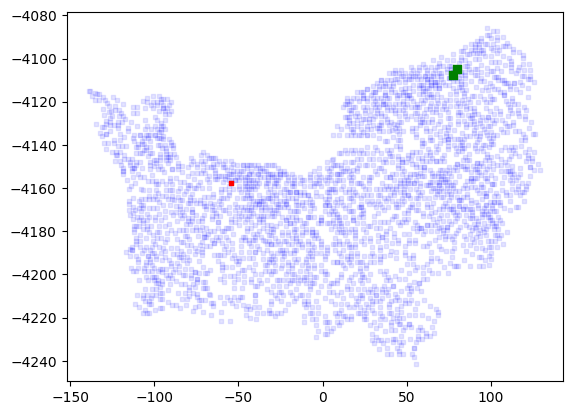

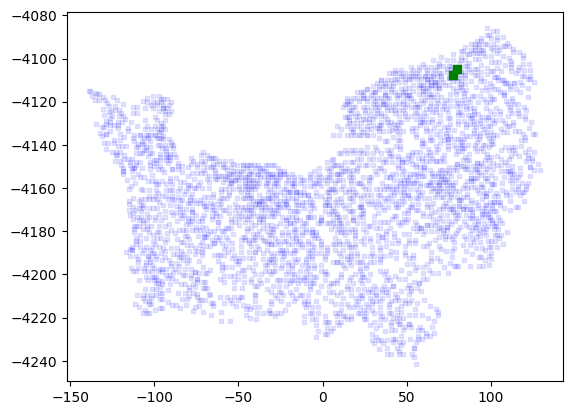

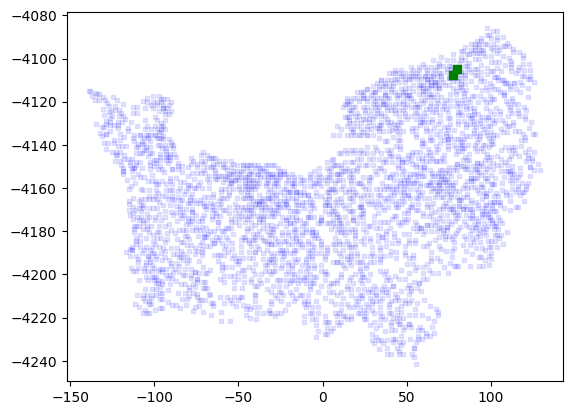

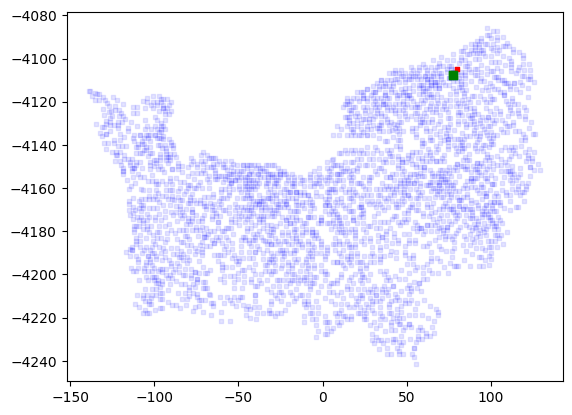

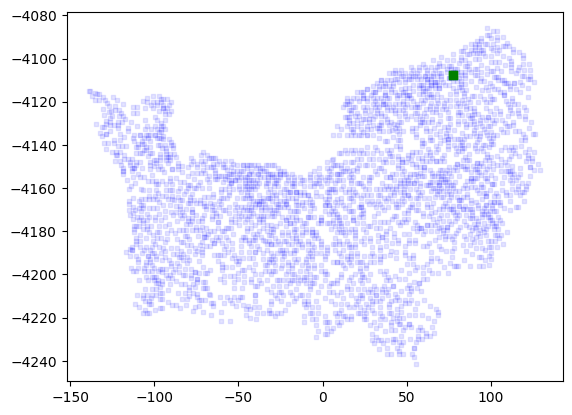

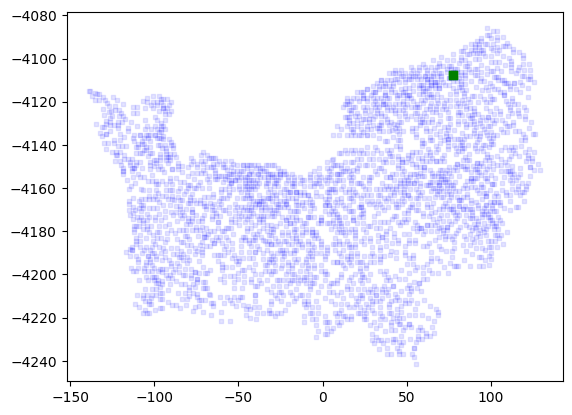

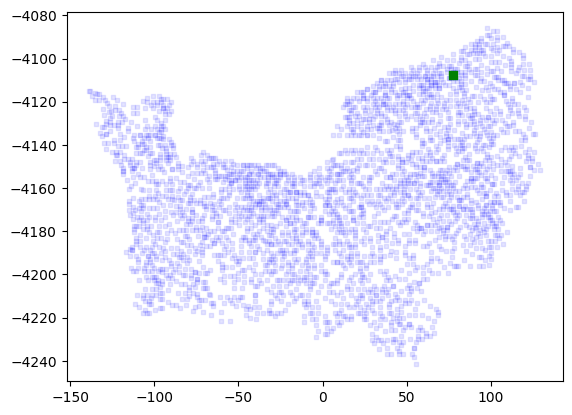

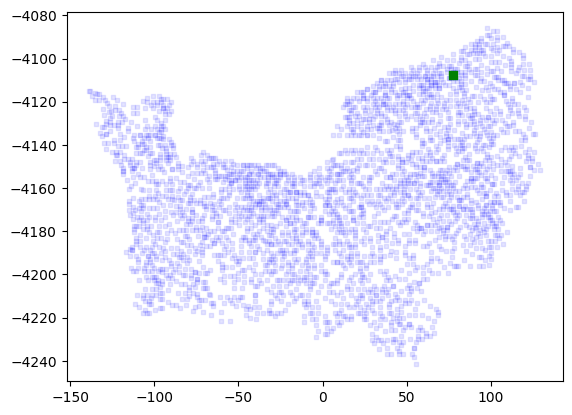

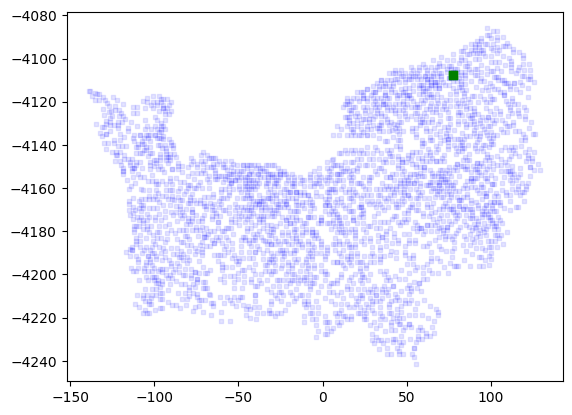

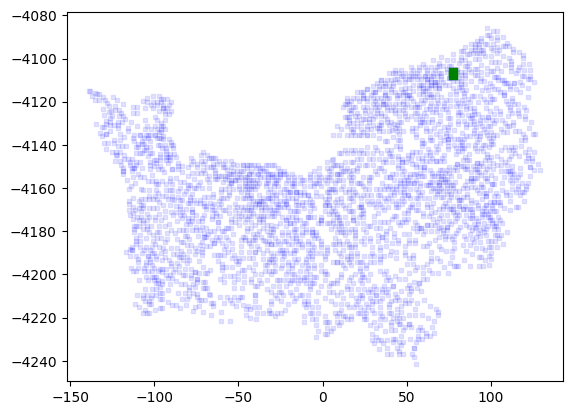

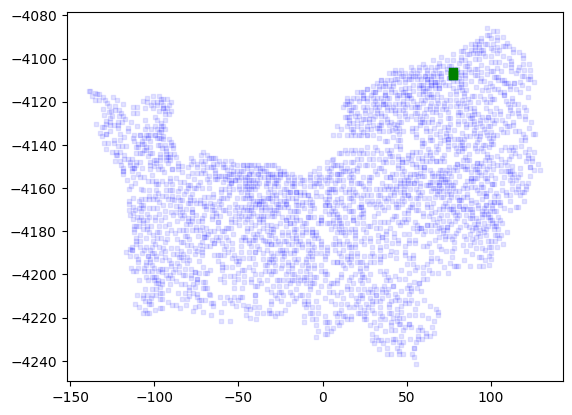

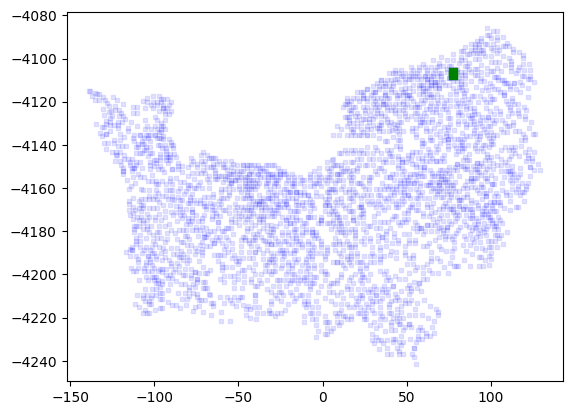

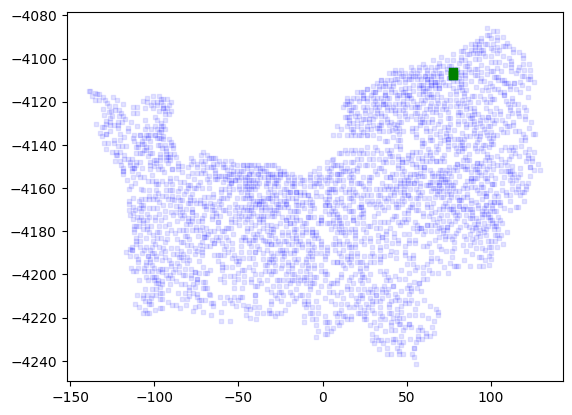

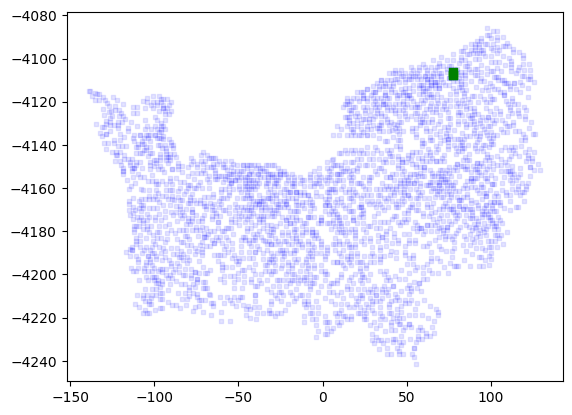

In [40]:
# YOUR CODE HERE
for i in range(20):
    villes_src = villes_contaminees
    n = np.shape(d_villes)
    alea = np.random.standard_normal(n)
    nouvelle_ville_contamine_valeur = alea 
    nouvelle_ville_contamine = nouvelle_ville_contamine_valeur>d_villes
    villes_contaminees =np.sum(nouvelle_ville_contamine * villes_src ,axis=1)
    villes_contaminees=villes_contaminees>0

    plt.scatter(cord[:,0],-cord[:,1],color='b',marker='s',s=5,alpha=0.1)
    plt.scatter(cord[villes_src,0],-cord[villes_src,1],color='r',marker='s',s=5)
    plt.scatter(cord[villes_contaminees,0],-cord[villes_contaminees,1],color='g',marker='s',)
    
    plt.show()

Création d'une animation (partie bonus)
-----

Étudiez le code suivant. Que fait ce code ? 

Rq : FFmpeg doit être installé sur la machine pour que le code soit fonctionel.

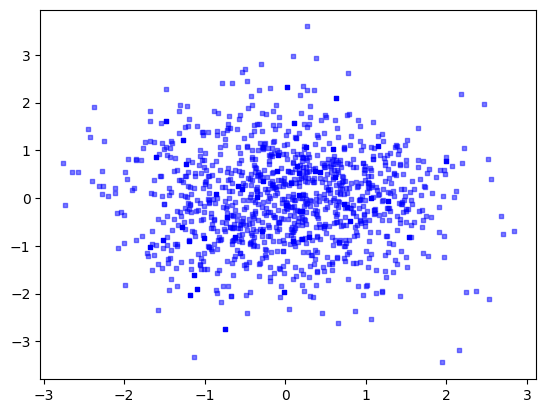

In [49]:
import matplotlib.animation as animation

points = np.zeros((0,2))

fig = plt.figure()
def updatefig(i):
	global points
	fig.clear()
	plt.scatter(points[:,0],points[:,1],color='b',marker='s',s=5,alpha=0.5)
	x = np.random.randn(50,2)
	plt.scatter(x[:,0],x[:,1],color='b',marker='s',s=5)
	plt.draw()
	points = np.concatenate([points,x],axis=0)

anim = animation.FuncAnimation(fig, updatefig, 20)	
anim.save("test.mp4", fps=5)


In [50]:
%%HTML
<video width="320" height="240" controls>
  <source src="test.mp4" type="video/mp4">
</video>

Reprenez le code de la partie précédente et au lieu d'afficher le résultat à l'écran, faites une petite animation de la propagation de la maladie. 

In [51]:
%%HTML
<video width="320" height="240" controls>
  <source src="test2.mp4" type="video/mp4">
</video>